# MY Neural :)
##### This is just a demo of how a neural network works 

##### Implementing a perceptron

-----------------------------------------------------

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### preparing data
------

In [2]:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

##### defining number of nodes in layers

---------------------------------

In [7]:
num_input = 2
num_hidden = 5
num_output = 1

##### Intializing Weights
-------------------

In [23]:
# intializing input to hidden layer

W_in_h = np.random.randn(num_input,num_hidden)
b_h = np.zeros((1,num_hidden))

# initializing hidden to output layer

W_h_op = np.random.randn(num_hidden,num_output)
b_op = np.zeros((1,num_output))

##### Define Sigmoid 
-----

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

##### Define Sigmoid Derivative
----

In [25]:
def sigmoidDerv(x):
    return np.exp(-x)/(1+np.exp(-x))**2

##### Define forward Propagation
----

In [26]:
def forward_prop(x,W_in_h,W_h_op):
    z1 = np.dot(x,W_in_h) + b_h
    a1 = sigmoid(z1)
    z2 = np.dot(a1,W_h_op) + b_op
    y_hat = sigmoid(z2)
    
    return z1,a1,z2,y_hat

##### Define backward Propagation
----

In [41]:
def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoidDerv(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,W_h_op.T)*sigmoidDerv(z1)
    dJ_dWxh = np.dot(x.T, delta1) 

    return dJ_dWxh, dJ_dWhy

##### Define Cost Function
----

In [42]:
def cost_func(y,y_hat):
    c = 0.5*sum((y-y_hat)**2)
    
    return c

In [44]:
# set learning rate and iterations

alpha = 0.01
num_iterations = 5000

cost = []
for i in range(num_iterations):
    
    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,W_in_h,W_h_op)
    
    #perform backward propagation and calculate gradients
    dJ_dW_in_h, dJ_dW_h_op = backward_prop(y_hat, z1, a1, z2)
        
    #update the weights
    W_in_h = W_in_h -alpha * dJ_dW_in_h
    W_h_op = W_h_op -alpha * dJ_dW_h_op
    
    #compute cost
    c = cost_func(y, y_hat)
    
    #store the cost
    cost.append(c)

##### plotting training 
----

Text(0, 0.5, 'Cost')

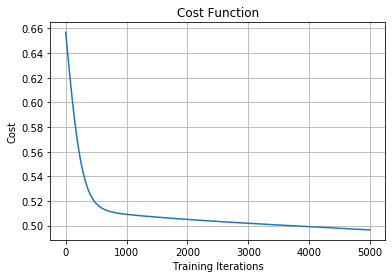

In [45]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')